## A short guide and example to run fingerprinting: PySASF by Target

### Exemple Catchment

This notebook show how to use our implementation of the “fingerprinting approach” based on the Clarke and Minella (2016) method. The proposed alternative approach allows calculating the proportions of each source in the composition of suspended sediment (by targets) present in rivers.

In this code:

In the next cell we can print some information about the dataset (Excel file) for:

Source(g1)=CB = Channel Banks

Source(g2)=UR = Unpaved Roads 

Source(g3)=CF = Crop Fields + Natural Grass

Tg = Target

In the code:

Sources = CB (S1,P1), UR (S2,P2) and CF (S3,P3)
Target = Tg

First Version= 11/03/24

Mod=20/08/25

Run=13/09/25
                                    

As a first step, the individual analysis of the discriminant ability of each element was performed by means of a range test to evaluate the conservativity and the Kruskal-Wallis test to estimate the discrimination power.

The first step is to import the fingerprinting python module:

In [1]:
from PySASF_3S_byTarget import PySASF_3S_byTarget

We need to create a fingerprinting object instance and to import the data file:

In [2]:
fp = PySASF_3S_byTarget("data_unmix_2.xlsx")  

In [3]:
fp.infos()

Sheet name: Source(g1)
Columns: ['V43', 'V45', 'V46', 'V50', 'V51', 'V53']
Number of samples: 8
--
Sheet name: Source(g2)
Columns: ['V43', 'V45', 'V46', 'V50', 'V51', 'V53']
Number of samples: 12
--
Sheet name: Source(g3)
Columns: ['V43', 'V45', 'V46', 'V50', 'V51', 'V53']
Number of samples: 16
--
Sheet name: Target(Tg)
Columns: ['V43', 'V45', 'V46', 'V50', 'V51', 'V53']
Number of samples: 10
--


In this cell below it is defined as:

nS1 = number of samples collected in the CB (Channel Banks)

nS2 = number of samples collected in the UR (Unpaved Roads) 

nS3 = number of samples collected in the CF (Crop Fields)

nTg = number of samples collected in the Target (Suspended Sediment)

In [4]:
nsample=[]
nsample = fp.nsample(nsample)
print('nsample', nsample)

nS1 = nsample[0]  # max 
nS2 = nsample[1]  # max 
nS3 = nsample[2] # max 
nTg = nsample[3] # max 


nsample [ 8 12 16 10]


 Cloud Proportions: Scatter plot of the set of feasible solutions of the overdetermined linear system
 
                    P1 = S1(CB) proportion
                    
                    P2 = S2(UR) proportion
                    
                    P3 = S3(CF) proportion
                    

Cloud Proportions: The confidence region ($95\%$) calculated from the set of feasible solutions using Solve=2 for all samples

Next Steps:

Run all sample combinations for each source list (Index1 = 1).

Calculate proportions using the Generalized Least Squares (GLS) method (Solve = 2).

Compute the 95% confidence region based on the set of feasible solutions.

Generate results:

   Calculate proportions for each target.

   Store results in a .csv file.

   Provide boxplots and a summary table of mean values.


nS1= 8 nS2= 12 nS3= 16
redus=100% [1.0]
Next step: BoxPlot with ALL run
Target  1


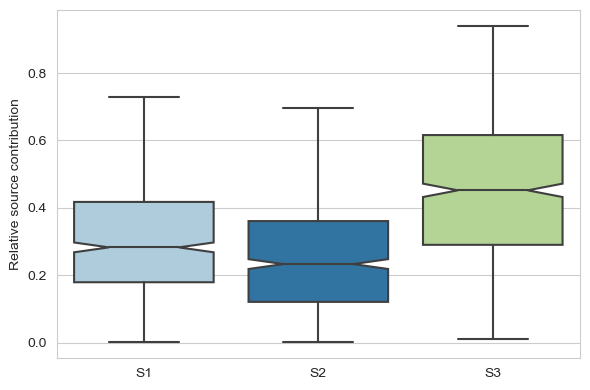

Next step: BoxPlot with ALL run
Target  2


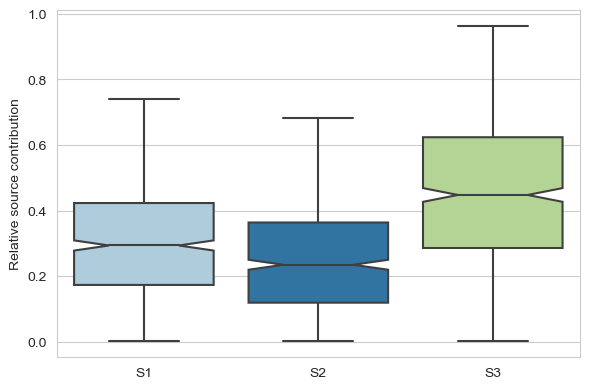

Next step: BoxPlot with ALL run
Target  3


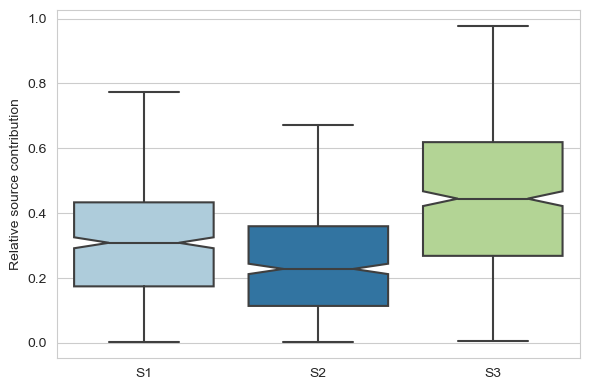

Next step: BoxPlot with ALL run
Target  4


Next step: BoxPlot with ALL run
Target  5


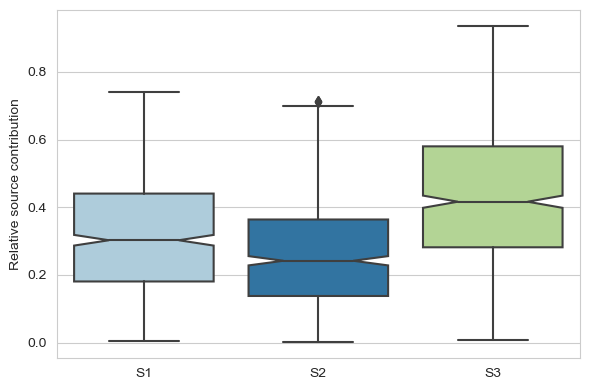

Next step: BoxPlot with ALL run
Target  6


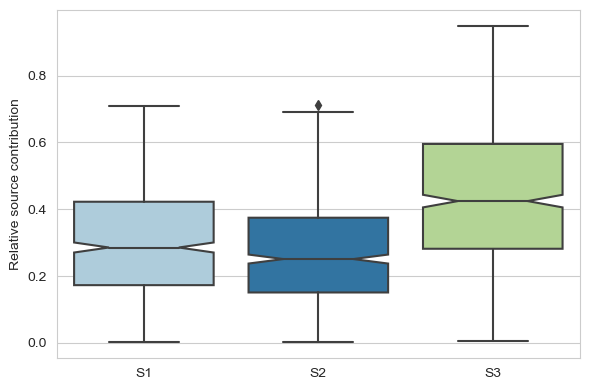

Next step: BoxPlot with ALL run
Target  7


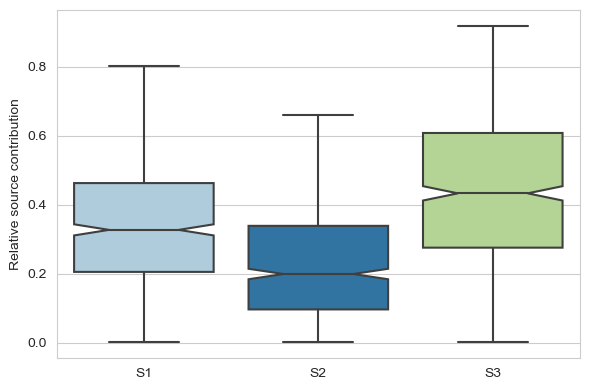

Next step: BoxPlot with ALL run
Target  8


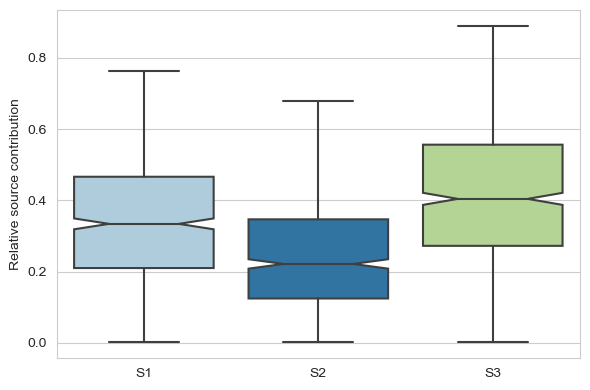

Next step: BoxPlot with ALL run
Target  9


Next step: BoxPlot with ALL run
Target  10


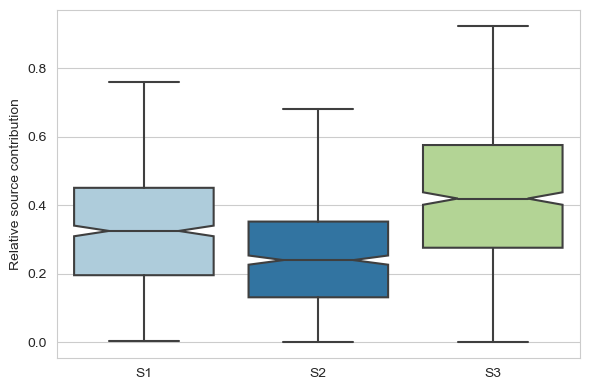

------------------------------------------------------------------------------------------------------------------------
Solve_2
Target 	MeanP1 	StdP1 	MeanP2 	StdP2 	MeanP3 	StdP3
____________________________________________________________________________________________________________
1 	0.301 	0.166 	0.252 	0.157 	0.447 	0.214
2 	0.302 	0.167 	0.252 	0.158 	0.446 	0.219
3 	0.312 	0.177 	0.247 	0.158 	0.440 	0.225
4 	0.352 	0.183 	0.237 	0.154 	0.412 	0.206
5 	0.312 	0.168 	0.263 	0.161 	0.425 	0.207
6 	0.299 	0.164 	0.270 	0.154 	0.431 	0.209
7 	0.336 	0.178 	0.230 	0.156 	0.434 	0.216
8 	0.342 	0.172 	0.246 	0.152 	0.412 	0.199
9 	0.307 	0.169 	0.249 	0.158 	0.444 	0.217
10 	0.328 	0.169 	0.254 	0.151 	0.418 	0.203
____________________________________________________________________________________________________________
---------------------------------------------------------------------------------------------------------
Next step: Figure


In [5]:
import numpy as np

solve = fp.multi_runs(nTg, nS1, nS2, nS3)

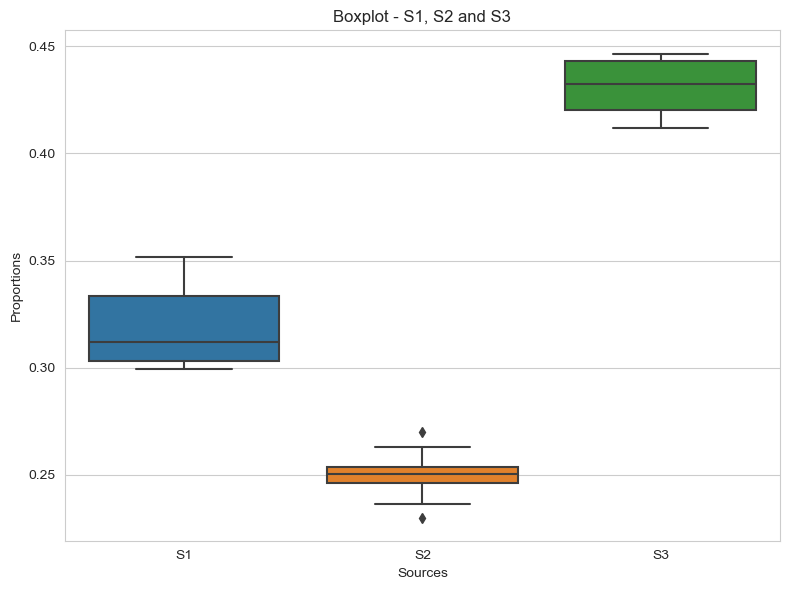

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Summary_3S_Ps_mean.csv")

# Function to plot boxplot or violin plot specifically for the columns MeanP1, MeanP2 and MeanP3
def plot_meanP(data, plot_type="box"):
    columns = ["MeanP1", "MeanP2", "MeanP3"]
    labels = ["S1", "S2", "S3"]

    df_melt = data[columns].melt(var_name="Variable", value_name="Value")
    
    # Replace variable names with desired labels
    df_melt["Variable"] = df_melt["Variable"].replace(dict(zip(columns, labels)))

    plt.figure(figsize=(8,6))

    if plot_type == "box":
        sns.boxplot(x="Variable", y="Value", data=df_melt)
        plt.title("Boxplot - S1, S2 and S3")
    elif plot_type == "violin":
        sns.violinplot(x="Variable", y="Value", data=df_melt)
        plt.title("Violin plot - S1, S2 and S3")
    else:
        raise ValueError("plot_type must be 'box' or 'violin'")

    # Set axis labels
    plt.xlabel("Sources")
    plt.ylabel("Proportions")

    plt.tight_layout()
    plt.show()

# Example of use
plot_meanP(df, plot_type="box")   # boxplot
plot_meanP(df, plot_type="violin")  # violin plot